In [1]:
import os
from pathlib import Path

import pandas as pd
import numpy as np

DATAPATH = os.getenv('DATAPATH')
CATALOG_PATH = Path(DATAPATH, 'raw', 'catalog2023', 'catalog2023_profile.parquet')
CATALOG_PATH_CSV = Path(DATAPATH, 'raw', 'catalog2023', 'chimefrb2023repeaters.csv')
CATALOG1_PATH_PARQUET = Path(DATAPATH, 'catalog_1.parquet')

In [2]:
def get_count_and_waiting_time(dataframe: pd.DataFrame, keep: list) -> pd.DataFrame:
    grouped = dataframe.groupby("repeater_name", group_keys=True)[keep].apply(lambda x:x)
    count = grouped.groupby('repeater_name')['mjd_400'].count().rename('count')
    grouped = pd.merge(grouped, count, on='repeater_name')
    grouped["wait"] = grouped.groupby('repeater_name')['mjd_400'].diff()
    grouped['log_wait'] = grouped['wait'].apply(lambda x: np.log10(x))
    return grouped

In [4]:
cat1 = pd.read_parquet(CATALOG1_PATH_PARQUET)[["eventname","repeater_name", "mjd_400"]]
cat1_grouped = get_count_and_waiting_time(cat1.loc[cat1['repeater_name'] != '-9999'], keep=['eventname', "mjd_400"])
cat1_grouped

,eventname,mjd_400,count,wait,log_wait
repeater_name,,,,,
FRB20121102A,FRB20181119D,58441.401872,9,NaN,NaN
FRB20121102A,FRB20181119D,58441.401872,9,1.500011e-07,-6.823905
FRB20121102A,FRB20181119D,58441.401872,9,2.300003e-07,-6.638272
FRB20121102A,FRB20181119D,58441.401872,9,-3.800014e-07,NaN
FRB20121102A,FRB20181119D,58441.401872,9,1.500011e-07,-6.823905
...,...,...,...,...,...
FRB20190303A,FRB20190421A,58594.333453,5,-1.830049e-07,NaN
FRB20190303A,FRB20190421A,58594.333453,5,1.830049e-07,-6.737537
FRB20190417A,FRB20190417A,58590.580611,1,NaN,NaN


In [5]:
cols = ["tns_name","repeater_name","mjd_400"]
cat2023 = pd.read_csv(CATALOG_PATH_CSV)[cols]
grouped = get_count_and_waiting_time(cat2023, keep=["tns_name", "mjd_400"])
grouped.sort_values(by='count', ascending=False)

,tns_name,mjd_400,count,wait,log_wait
repeater_name,,,,,
FRB20201130A,FRB20210205D,59250.138085,13,1.795384e+01,1.254157
FRB20201130A,FRB20201225D,59208.249328,13,2.493031e+01,1.396728
FRB20201130A,FRB20210406A,59310.966072,13,1.096575e+01,1.040038
FRB20201130A,FRB20210228B,59273.069108,13,2.031011e-07,-6.692288
FRB20201130A,FRB20210228B,59273.069108,13,7.973057e+00,0.901625
...,...,...,...,...,...
FRB20200508H,FRB20200508H,58977.016030,2,NaN,NaN
FRB20200508H,FRB20200508C,58977.800000,2,7.839697e-01,-0.105701
FRB20200828A,FRB20200828A,59089.738911,2,NaN,NaN


d:\home\kerja\sarjana\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


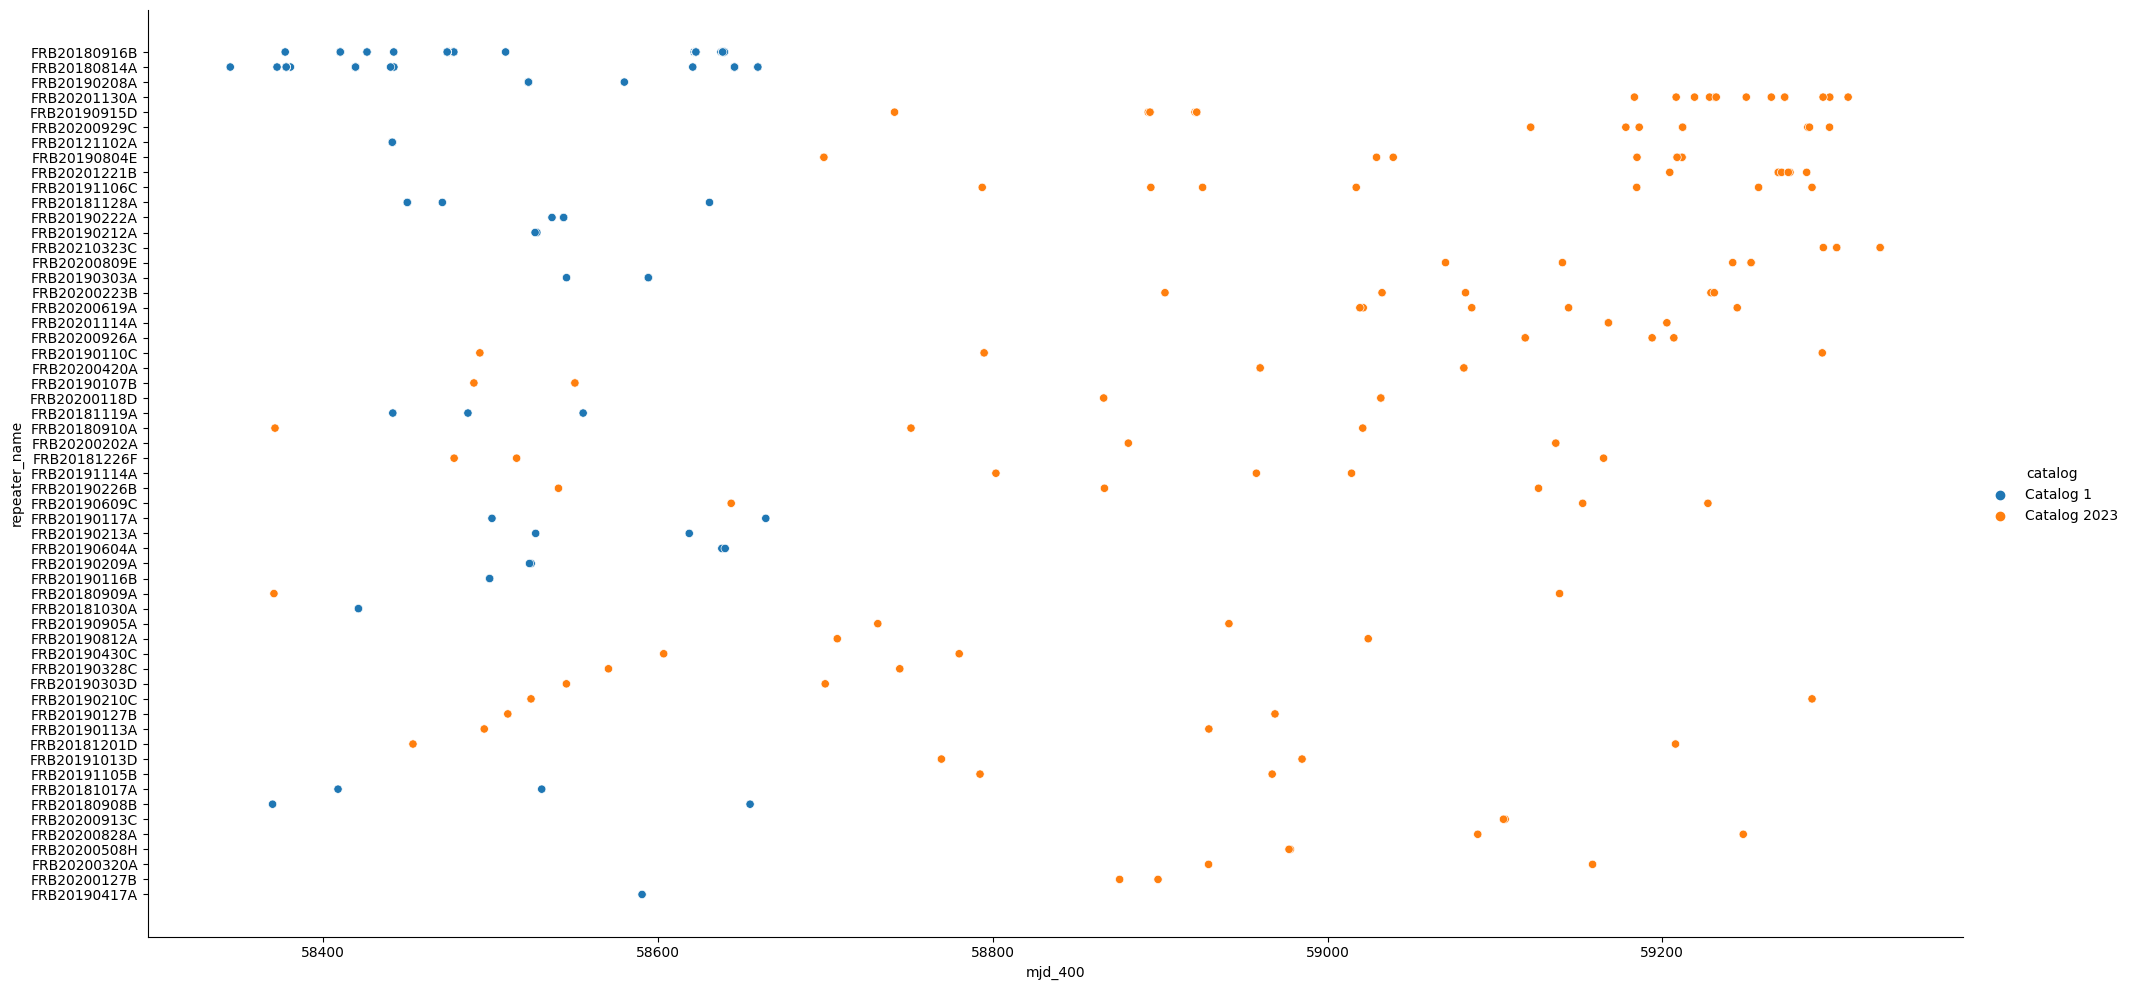

In [6]:
import seaborn as sns

grouped['catalog'] = 'Catalog 2023'
cat1_grouped['catalog'] = 'Catalog 1'

data = pd.concat([grouped, cat1_grouped])

sns.relplot(data.sort_values(by='count', ascending=False), x='mjd_400', y='repeater_name', hue='catalog', aspect=2, height=10,)

In [6]:
data.loc[data['count']<80].sort_values(by='count')

,tns_name,mjd_400,count,wait,log_wait,catalog,eventname
repeater_name,,,,,,,
FRB20190417A,NaN,58590.580611,1,NaN,NaN,Catalog 1,FRB20190417A
FRB20180909A,FRB20180909A,58370.705981,2,NaN,NaN,Catalog 2023,NaN
FRB20200828A,FRB20200828A,59089.738911,2,NaN,NaN,Catalog 2023,NaN
FRB20200508H,FRB20200508C,58977.800000,2,7.839697e-01,-0.105701,Catalog 2023,NaN
FRB20200508H,FRB20200508H,58977.016030,2,NaN,NaN,Catalog 2023,NaN
...,...,...,...,...,...,...,...
FRB20180916B,NaN,58622.743352,77,5.799666e-08,-7.236597,Catalog 1,FRB20190519A
FRB20180916B,NaN,58622.743352,77,-5.799666e-08,NaN,Catalog 1,FRB20190519A
FRB20180916B,NaN,58622.743352,77,5.799666e-08,-7.236597,Catalog 1,FRB20190519A


In [7]:
data.to_csv('catalog.csv')

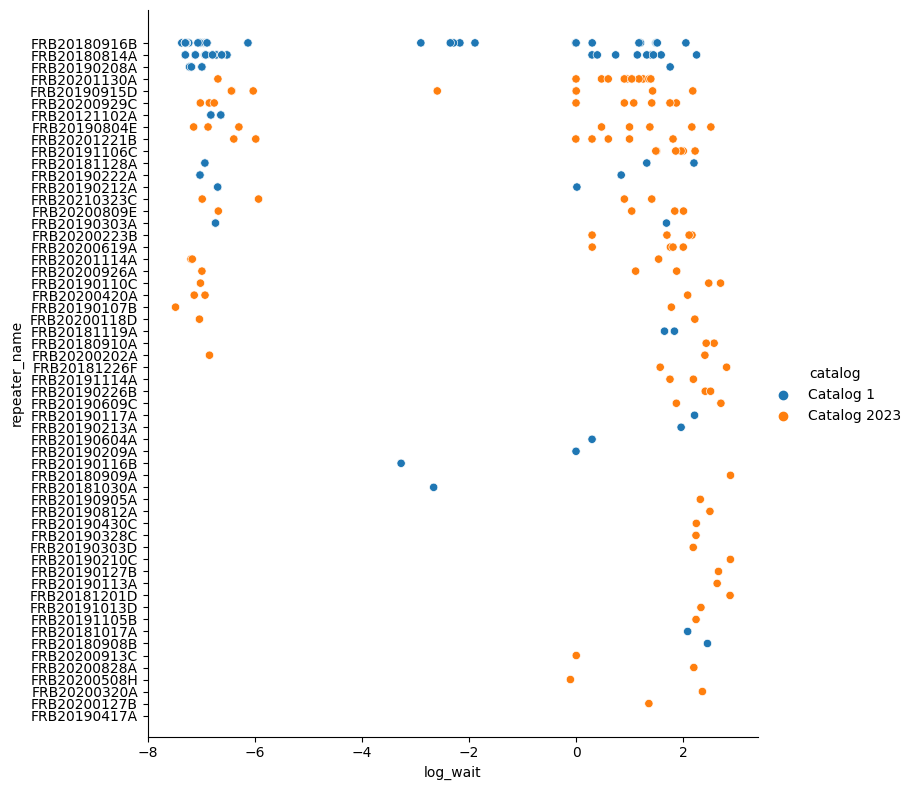

In [73]:
g = sns.relplot(data.sort_values(by='count', ascending=False).reset_index(), x='log_wait', y='repeater_name', hue='catalog', height=8)

[None]

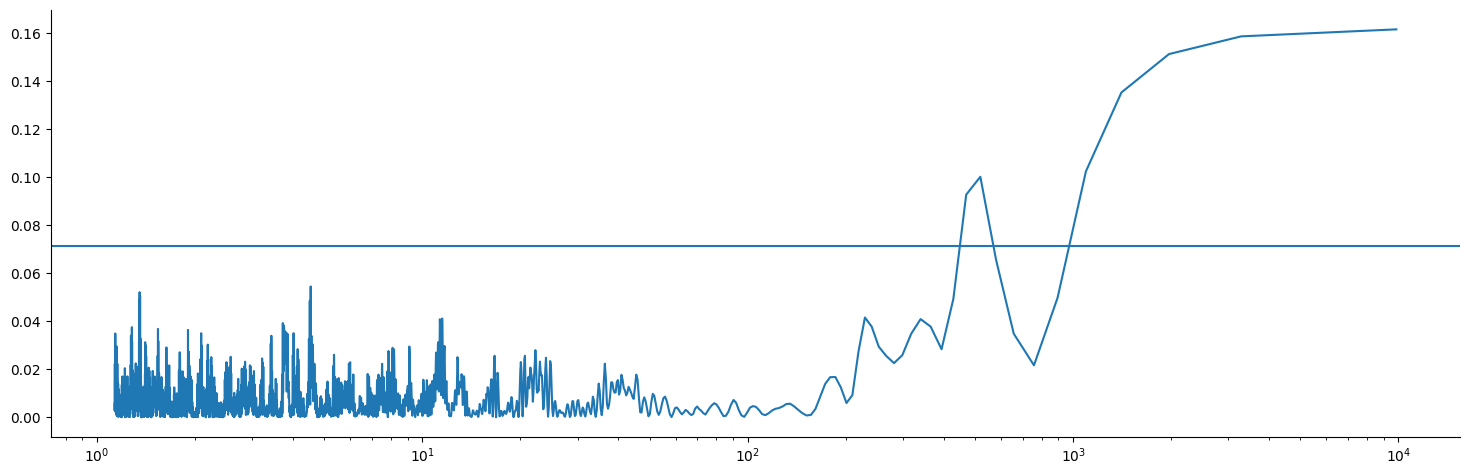

In [88]:
from astropy.timeseries import LombScargle
from astropy import units as u
from astropy.time import Time

timeseries = data.sort_values(by='mjd_400', ascending=True).reset_index()[["repeater_name", "mjd_400"]]

repeater = timeseries['repeater_name'].unique()

idx = np.random.choice(
range(len(repeater))
)
choice = 'FRB20201130A'
# choice = 'FRB20190915D'
# choice = 'FRB20121102A'
# choice = 'FRB20200929C'
# choice = 'FRB20190804E'

periodogram = LombScargle(
    Time(timeseries['mjd_400'].to_numpy(), format='mjd'), 
    (timeseries['repeater_name'] == choice).to_numpy()
    )
freq, power = periodogram.autopower()
false_alarm_prob = periodogram.false_alarm_level(0.01)

a = sns.relplot(x=1/freq, y=power, kind='line', aspect=3)
# a.ax.axvline(16, color='green')
a.ax.axhline(false_alarm_prob)
a.ax.set(xscale='log')

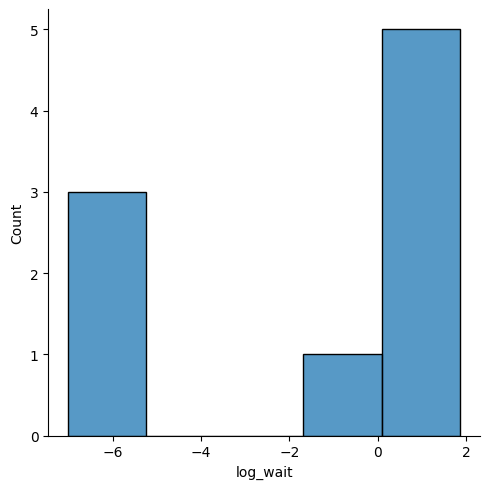

In [72]:
resetted = data.reset_index()
g = sns.displot(resetted.loc[resetted['repeater_name'] == choice], x='log_wait')
# data.reset_index()

In [75]:
def window_func(freq: np.ndarray, time: np.ndarray) -> np.ndarray:
    def exponential(time_: float, freq_: float) -> np.ndarray:
       return -2*np.pi*freq_*time_
    ex = []
    for f in freq:
        ex.append(np.sum(np.exp(exponential(time, f))))
    return np.array(ex)**2

[None, (0.0, 1.0)]

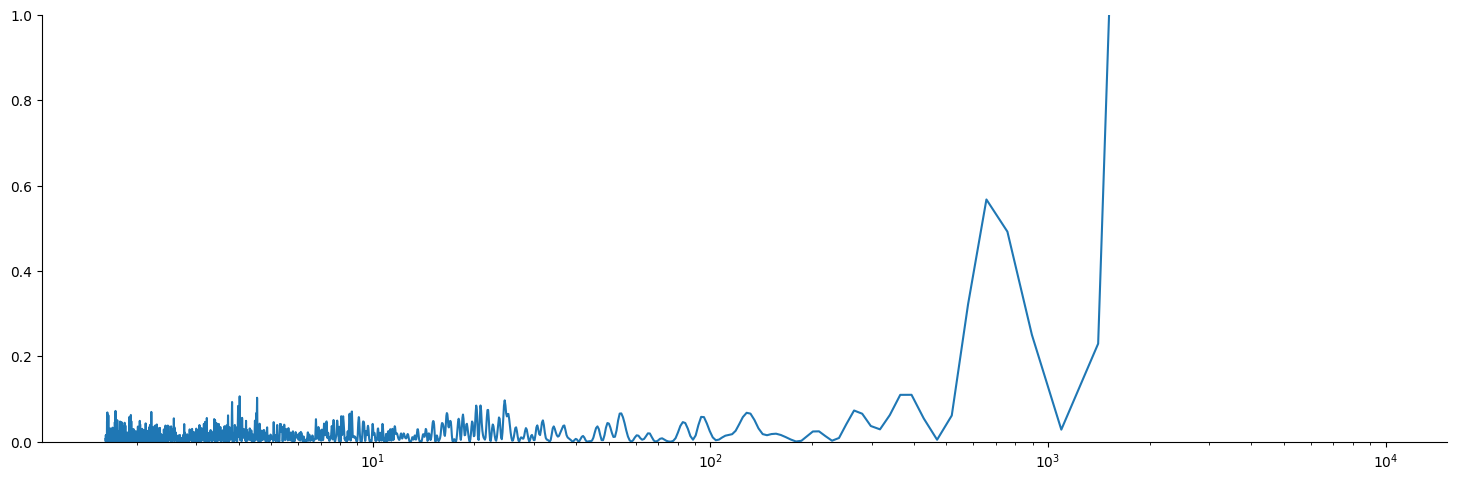

In [87]:
wind = LombScargle(Time(timeseries['mjd_400'].unique(), format='mjd'), 1)
freq_wind, power_wind = wind.autopower()

a = sns.relplot(x=1/freq_wind, y=power_wind, kind='line', aspect=3)
a.ax.set(xscale='log', ylim=(0,1))